In [1]:
using Plots
using Combinatorics: multiset_combinations

In [52]:
g = rand(5)

5-element Vector{Float64}:
 0.5416029600681982
 0.19499014584627206
 0.2564156508257316
 0.5958559349169081
 0.060427551663125745

In [62]:
reverse(cumprod(reverse(g[2:end])))

4-element Vector{Float64}:
 0.0018002526609933941
 0.009232531486040798
 0.03600611529097156
 0.060427551663125745

In [3]:
function valuation(x::Vector{Bool}; t=t::Vector{Float64}, f=f::Vector{Float64})
    @assert issorted(t)
    m = length(x)
    
    # Storing this cumprod yields an O(m) improvement
    omf_cumprod = ones(m)
    omf_cumprod[1:m-1] = reverse(cumprod(reverse(1 .- f[2:end])))
    
    res = sum(x[j] * t[j] * f[j] * prod(1 - f[l]*x[l] for l in j+1:m) for j in 1:m-1)
    res += x[m] * t[m] * f[m]
    return res
end

function optimize(h; t=t::Vector{Float64}, f=f::Vector{Float64})
    @assert issorted(t)
    m = length(t)
    x = zeros(Bool, m)
    v = 0.0
    best = zeros(Bool, m)
    
    for X in multiset_combinations(1:m, h)
        x[:] .= 0
        x[X] .= true
        if (w = valuation(x)) > v
            v = w
            best[:] = x[:]
        end
    end
    
    return best
end

function plotsmaker()
    m = length(t)
    
    pl = [plot(
            xlabel="f",
            ylabel="t",
            size=(700, 700)
            ) for i in 1:m+2]
    
    x = zeros(Bool, m, m)
    
    scatter!(pl[1], f, t, c=:darkslategray, ms=11, msw=0, msa=0, legend=nothing)
    
    for i in 1:m
        x[:, i] = optimize(i)
        
        scatter!(pl[i+1], f[.!x[:, i]], t[.!x[:, i]], c=:darkslategray, ms=11, msw=0, msa=0, label=nothing)
        scatter!(pl[i+1], f[x[:, i]], t[x[:, i]], c=:orangered, ms=11, msw=0, msa=0, label="apply when h = $i")
    end
    
    apporder = invperm(sortperm(reshape(sum(x, dims=2), :), rev=true))
    
    scatter!(pl[end], f, t, c=:forestgreen, ms=13, msw=0, msa=0, legend=nothing)
    annotate!(pl[end], [(f[i], t[i], text("$(apporder[i])", 9, :white)) for i in 1:m])
    
    return pl, x, apporder
end

plotsmaker (generic function with 1 method)

In [68]:
m = 20

φ = 0.7
# t = rand(m) |> sort
# f = 1 .- (φ*t + (1-φ)*rand(m))

@time pl, x, apporder = plotsmaker()

for c in eachcol(x)
    println(c)
end

  4.038909 seconds (22.64 M allocations: 2.091 GiB, 9.39% gc time, 7.32% compilation time)
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Bool[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Bool[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

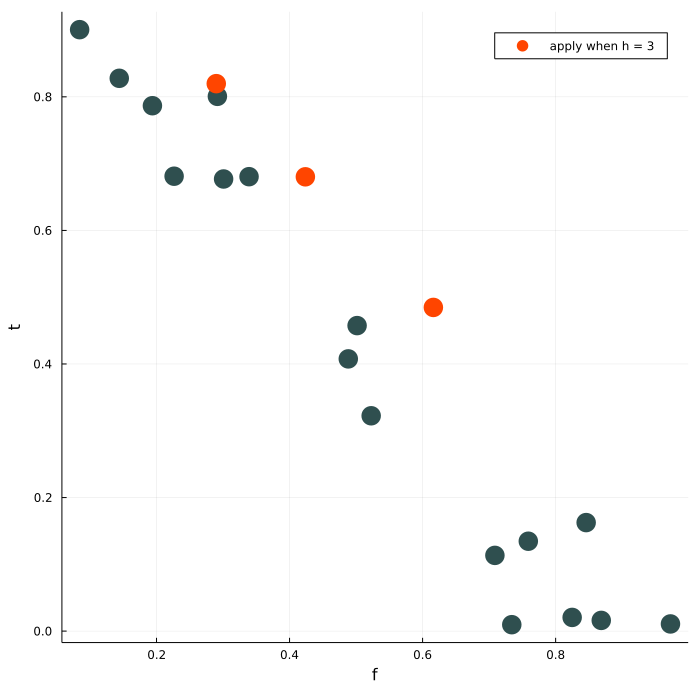

In [72]:
# for (n, i) in enumerate(pl)
#       display(i)
# end
display(pl[4])

In [47]:
for (n, i) in enumerate(pl)
    savefig(i, "optportfolio-$(n-1).png")
    savefig(i, "optportfolio-$(n-1).pdf")
end

In [33]:
for i in 0:length(pl)-1
    print("\\begin{frame}\\begin{center}\\includegraphics[height=\\textheight]{./plots/optportfolio-$i.pdf}\\end{center}\\end{frame}\n")
end

\begin{frame}\begin{center}\includegraphics[height=\textheight]{./plots/optportfolio-0.pdf}\end{center}\end{frame}
\begin{frame}\begin{center}\includegraphics[height=\textheight]{./plots/optportfolio-1.pdf}\end{center}\end{frame}
\begin{frame}\begin{center}\includegraphics[height=\textheight]{./plots/optportfolio-2.pdf}\end{center}\end{frame}
\begin{frame}\begin{center}\includegraphics[height=\textheight]{./plots/optportfolio-3.pdf}\end{center}\end{frame}
\begin{frame}\begin{center}\includegraphics[height=\textheight]{./plots/optportfolio-4.pdf}\end{center}\end{frame}
\begin{frame}\begin{center}\includegraphics[height=\textheight]{./plots/optportfolio-5.pdf}\end{center}\end{frame}
\begin{frame}\begin{center}\includegraphics[height=\textheight]{./plots/optportfolio-6.pdf}\end{center}\end{frame}
\begin{frame}\begin{center}\includegraphics[height=\textheight]{./plots/optportfolio-7.pdf}\end{center}\end{frame}
\begin{frame}\begin{center}\includegraphics[height=\textheight]{./plots/optportf

## Example for which greedy algorithm is inoptimal

In [3]:
f = [0.4, 0.4, 0.3]
t = [0.7, 0.8, 0.9]

pl, x, apporder = plotsmaker()

so = sortperm(t .* f, rev=true)
for c in eachcol(x)
    println(c[so])
end

Bool[1, 0, 0]
Bool[1, 0, 1]
Bool[1, 1, 1]


In [311]:
[f t f .* t]

3×3 Matrix{Float64}:
 0.4  0.7  0.28
 0.4  0.8  0.32
 0.3  0.9  0.27

## Comparative statics example

In [4]:
t = Float64.(collect(range(start=200, step=50, length=8)))
f = [0.39, 0.33, 0.24, 0.24, 0.05, 0.03, 0.1, 0.12]

8-element Vector{Float64}:
 0.39
 0.33
 0.24
 0.24
 0.05
 0.03
 0.1
 0.12

In [5]:
pl, x, apporder = plotsmaker()
v = [valuation(x[:, i]) for i in 1:8]

[t f apporder round.(v)[apporder]]

8×4 Matrix{Float64}:
 200.0  0.39  4.0  230.0
 250.0  0.33  2.0  147.0
 300.0  0.24  6.0  282.0
 350.0  0.24  1.0   84.0
 400.0  0.05  7.0  289.0
 450.0  0.03  8.0  294.0
 500.0  0.1   5.0  258.0
 550.0  0.12  3.0  195.0

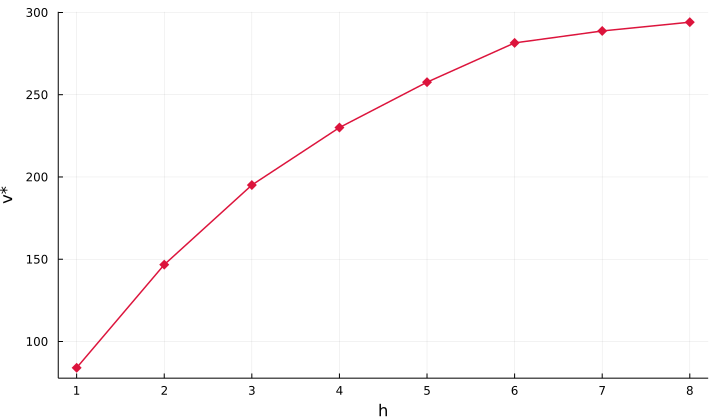

In [40]:
pl = plot(v, legend=false, size=(720, 420), xlabel="h", ylabel="v*", lw=1.5, color=:crimson, xticks=1:8, marker=:diamond, msw=0, msa=0, ms=5)

In [41]:
savefig(pl, "h-utility.png")
savefig(pl, "h-utility.pdf")

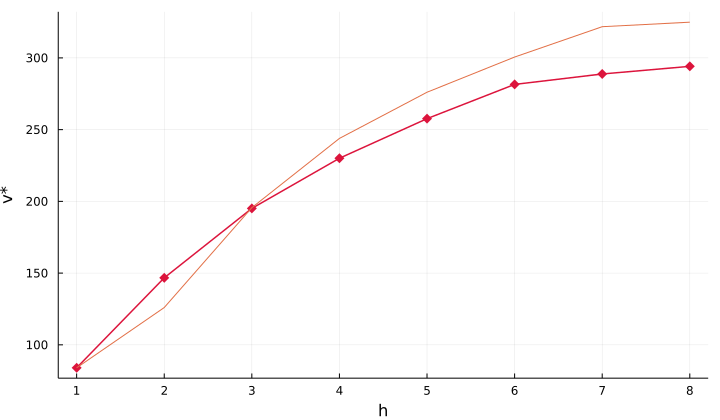

In [17]:
pl = plot(v, legend=false, size=(720, 420), xlabel="h", ylabel="v*", lw=1.5, color=:crimson, xticks=1:8, marker=:diamond, msw=0, msa=0, ms=5)
plot!(pl, w)

In [16]:
w = copy(v)
for j in 2:8
    w[j] = v[j-1] * (j+1)/(j)
end
w
    

8-element Vector{Float64}:
  84.0
 126.0
 195.6
 243.87
 276.0569856
 300.5831957333333
 321.7296477622857
 324.8749909152

In [28]:
t = Float64.(collect(range(start=200, step=50, length=8)))
t = vcat(t, 600)
f = [0.39, 0.33, 0.24, 0.24, 0.05, 0.03, 0.1, 0.12, 0.0001]

pl, x, apporder = plotsmaker()
apporder

9-element Vector{Int64}:
 4
 2
 6
 1
 7
 8
 5
 3
 9